# Final Project

Trent Adamson 

Jack Dorner

Luke Stevens

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
resumes_df = pd.read_csv('./Data_Needs_updated_after_selection_sunday/Resumes.csv')
resumes_df.head(10)

,YEAR,TEAM NO,TEAM,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,Q2 W,Q1 PLUS Q2 W,Q3 Q4 L,PLUS 500,R SCORE,BID TYPE
0,2024,1067,Connecticut,1,1,2,2,1,1,1.5,13,8,21,0,29,99.98,Auto
1,2024,1056,Houston,1,16,1,3,3,2,1.5,16,3,19,0,27,99.97,At-Large
2,2024,1038,North Carolina,1,16,8,5,5,6,10.0,9,7,16,0,20,99.91,At-Large
3,2024,1033,Purdue,1,2,3,1,2,3,3.0,12,8,20,0,25,99.96,At-Large
4,2024,1077,Arizona,2,16,4,10,11,14,5.5,8,7,15,1,18,99.87,At-Large
5,2024,1053,Iowa St.,2,16,6,4,4,4,5.5,10,6,16,0,21,99.86,Auto
6,2024,1047,Marquette,2,16,14,7,6,9,13.0,9,6,15,0,17,99.78,At-Large
7,2024,1024,Tennessee,2,8,7,6,8,8,7.0,8,5,13,0,17,99.89,At-Large
8,2024,1075,Baylor,3,32,13,8,10,25,13.5,10,4,14,0,14,99.73,At-Large
9,2024,1066,Creighton,3,16,11,9,13,17,10.0,8,7,15,0,15,99.74,At-Large


In [3]:
shooting_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Shooting Splits.csv')
shooting_df.describe()

,YEAR,TEAM NO,TEAM ID,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,CLOSE TWOS SHARE,CLOSE TWOS FG%D,...,CLOSE TWOS FG%D RANK,CLOSE TWOS D SHARE RANK,FARTHER TWOS FG% RANK,FARTHER TWOS SHARE RANK,FARTHER TWOS FG%D RANK,FARTHER TWOS D SHARE RANK,THREES FG% RANK,THREES SHARE RANK,THREES FG%D RANK,THREES D SHARE RANK
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,2016.807165,605.000000,127.011591,89.611802,6.802002,88.202634,4.968493,62.431823,35.548156,57.850263,...,134.570074,140.613277,145.985248,180.139094,128.338251,224.060063,125.158061,181.884089,115.561644,165.981033
std,4.387087,274.097002,71.741720,4.515565,2.877254,4.920774,1.462314,4.098137,4.966173,4.169058,...,95.843274,92.914274,98.697412,97.146664,93.228873,91.670546,92.241853,97.292348,85.177066,100.304766
min,2010.000000,131.000000,1.000000,64.300000,0.500000,70.400000,1.100000,48.000000,14.800000,43.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2013.000000,368.000000,68.000000,86.900000,4.800000,85.000000,3.900000,59.700000,32.400000,55.000000,...,48.000000,64.000000,57.000000,100.000000,49.000000,158.000000,44.000000,97.000000,44.000000,83.000000
50%,2017.000000,605.000000,125.000000,90.000000,6.500000,88.700000,4.900000,62.500000,35.600000,57.900000,...,123.000000,126.000000,132.000000,181.000000,113.000000,240.000000,109.000000,185.000000,98.000000,164.000000
75%,2021.000000,842.000000,194.000000,92.600000,8.700000,91.700000,5.900000,65.100000,38.900000,60.500000,...,207.000000,211.000000,226.000000,262.000000,198.000000,300.000000,195.000000,265.000000,174.000000,251.000000
max,2024.000000,1079.000000,251.000000,100.000000,17.100000,100.000000,12.200000,78.500000,51.700000,75.600000,...,363.000000,357.000000,362.000000,361.000000,355.000000,363.000000,363.000000,354.000000,346.000000,362.000000


In [4]:
shooting_df_2024 = shooting_df[shooting_df['YEAR'] == 2024]
shooting_2024_by_team_id = shooting_df_2024.sort_values(by = 'TEAM ID')
dunks = shooting_df_2024['DUNKS FG%']
shooting_2024_by_team_id.describe()

,YEAR,TEAM NO,TEAM ID,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,CLOSE TWOS SHARE,CLOSE TWOS FG%D,...,CLOSE TWOS FG%D RANK,CLOSE TWOS D SHARE RANK,FARTHER TWOS FG% RANK,FARTHER TWOS SHARE RANK,FARTHER TWOS FG%D RANK,FARTHER TWOS D SHARE RANK,THREES FG% RANK,THREES SHARE RANK,THREES FG%D RANK,THREES D SHARE RANK
count,68.0,68.00000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2024.0,1045.50000,126.735294,88.988235,7.280882,87.270588,5.369118,61.213235,37.210294,57.392647,...,164.014706,128.455882,150.647059,189.941176,131.147059,237.985294,119.088235,183.588235,118.426471,183.720588
std,0.0,19.77372,79.198714,4.600601,2.708762,5.134957,1.315494,4.385659,4.782404,4.065116,...,109.373725,99.047318,98.021588,102.952515,98.927271,93.559223,87.821518,103.119874,86.702668,109.761321
min,2024.0,1012.00000,2.000000,77.900000,1.800000,73.600000,2.200000,48.500000,25.300000,48.000000,...,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000
25%,2024.0,1028.75000,53.750000,86.225000,5.375000,83.825000,4.550000,58.750000,33.975000,54.650000,...,59.750000,37.250000,71.000000,93.250000,51.500000,161.000000,40.000000,96.750000,50.500000,90.750000
50%,2024.0,1045.50000,124.500000,88.800000,7.050000,87.800000,5.600000,61.500000,36.750000,57.650000,...,166.500000,117.000000,138.000000,201.500000,113.000000,258.500000,111.000000,174.500000,105.000000,176.000000
75%,2024.0,1062.25000,199.250000,92.225000,9.075000,90.625000,6.200000,64.225000,41.450000,59.700000,...,243.000000,210.000000,235.000000,272.750000,201.000000,318.500000,173.250000,282.000000,182.000000,286.250000
max,2024.0,1079.00000,251.000000,100.000000,13.200000,97.700000,8.100000,72.900000,48.100000,66.700000,...,361.000000,350.000000,362.000000,361.000000,355.000000,362.000000,354.000000,348.000000,346.000000,362.000000


In [5]:
df_matchups = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
df_matchups.head(20)

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE
0,2024,2014,2014,1067,Connecticut,1,1,64,91
1,2024,2013,2013,1026,Stetson,16,64,64,52
2,2024,2012,2012,1060,Florida Atlantic,8,64,64,65
3,2024,2011,2011,1036,Northwestern,9,32,64,77
4,2024,2010,2010,1029,San Diego St.,5,16,64,69
5,2024,2009,2009,1020,UAB,12,64,64,65
6,2024,2008,2008,1076,Auburn,4,64,64,76
7,2024,2007,2007,1012,Yale,13,32,64,78
8,2024,2006,2006,1073,BYU,6,64,64,67
9,2024,2005,2005,1062,Duquesne,11,32,64,71


In [6]:
all_time_results_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Team Results.csv')
all_time_tourny_win_percent = all_time_results_df['WIN%']
team_rankings_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/TeamRankings.csv')
team_rankings_2024 = team_rankings_df[team_rankings_df['YEAR'] == 2024]
round_reached_all_time = team_rankings_df[['TEAM NO', 'ROUND']]
round_reached_all_time.head()


,TEAM NO,ROUND
0,1079,64
1,1078,4
2,1077,16
3,1076,64
4,1075,32


In [7]:
round_reached_dict = dict(zip(round_reached_all_time['TEAM NO'], round_reached_all_time['ROUND']))

def create_stat_vs_round_vector(stat_df, stat):
    stat_vector = []
    round_vector = []
    stat_dict = dict(zip(stat_df['TEAM NO'], stat_df[stat]))

    for key in round_reached_dict:
        if key > 131:
            stat_vector.append(stat_dict[key])
            round_vector.append(round_reached_dict[key])
    return stat_vector, round_vector

In [8]:
import seaborn as sns
from scipy.stats import kruskal
import numpy as np

list_KW_values = []
list_p_values = []
valid_columns = []

def perform_kruskal_wallis(df, dropped_columns_list):
    # drop any categorical column names 
    column_names = df.columns.drop(dropped_columns_list)

    for column_name in column_names:
        
        samples_by_group = []

        stat_vector, round_vector = create_stat_vs_round_vector(df, column_name)

        stat_vector = np.array(stat_vector)
        round_vector = np.array(round_vector)
        
        # Combines data for champion, finalist, and final four teams 
        replace_dict = {1 : 4, 2 : 4}
        rounds = np.array([replace_dict.get(x, x) for x in round_vector])
        
        for value in np.unique(rounds):
            mask = rounds == value
            data = stat_vector[mask]
            if len(np.unique(data)) > 1:
                samples_by_group.append(data)
        
        
        if len(samples_by_group) >= 2:
            stat, p = kruskal(*samples_by_group)
            list_KW_values.append(stat)
            list_p_values.append(p)
            valid_columns.append(column_name)
        

        # sns.violinplot(x = rounds, y = stat_vector)

        # plt.title(f'{column_name} vs Round')
        # plt.xlabel('Round Reached')
        # plt.ylabel(column_name)
        # plt.show()


    print(len(valid_columns), len(list_KW_values), len(list_p_values))
    df2 = pd.DataFrame({
        'variable_name': valid_columns,
        'test_statistic (K.W.)': list_KW_values,
        'p-value': list_p_values
    })
    alpha = 0.05
    num_hypothesis_tests = len(valid_columns)

    # Bonferroni Correction
    df2['significant_relationship'] = df2['p-value'] < (alpha / num_hypothesis_tests)

    return df2

In [9]:
team_rankings_dropped_columns = ['TEAM', 'TEAM NO', 'YEAR', 'ROUND']
team_rankings_KW_results = perform_kruskal_wallis(team_rankings_df, team_rankings_dropped_columns)
team_rankings_KW_results = team_rankings_KW_results[team_rankings_KW_results['significant_relationship'] == True]
team_rankings_KW_results = team_rankings_KW_results.sort_values(by = 'p-value')
team_rankings_KW_results.head(len(team_rankings_KW_results))

39 39 39


,variable_name,test_statistic (K.W.),p-value,significant_relationship
0,SEED,349.720304,2.010579e-73,True
11,LAST,341.014973,1.504296e-71,True
1,TR RANK,340.872968,1.613986e-71,True
9,HI,304.119674,1.302910e-63,True
10,LO,292.314707,4.494819e-61,True
2,TR RATING,284.729224,1.918091e-59,True
12,SOS RANK,261.697590,1.696593e-54,True
16,SOS LAST,260.481136,3.095391e-54,True
3,V 1-25 WINS,218.083649,3.823414e-45,True
13,SOS RATING,202.135632,9.920139e-42,True


In [10]:
KenPom_Barttorvik_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/KenPom Barttorvik.csv')
KenPom_Bart_dropped_columns = ['YEAR', 'CONF', 'CONF ID', 'QUAD ID', 'QUAD ID', 'TEAM NO', 'TEAM ID', 'TEAM', 'SEED', 'ROUND']
KenPom_Barttorvik_KW_results = perform_kruskal_wallis(KenPom_Barttorvik_df, KenPom_Bart_dropped_columns)
KenPom_Barttorvik_KW_results = KenPom_Barttorvik_KW_results[KenPom_Barttorvik_KW_results['significant_relationship'] == True]
KenPom_Barttorvik_KW_results = KenPom_Barttorvik_KW_results.sort_values(by = 'p-value')
KenPom_Barttorvik_KW_results.head(len(KenPom_Barttorvik_KW_results))

133 133 133


,variable_name,test_statistic (K.W.),p-value,significant_relationship
0,SEED,349.720304,2.010579e-73,True
95,WAB,345.825728,1.386003e-72,True
57,BARTHAG,344.401049,2.808377e-72,True
54,BADJ EM,343.571814,4.236042e-72,True
52,KADJ EM,342.535000,7.081807e-72,True
...,...,...,...,...
68,OREB%,34.969527,1.525867e-06,True
104,TOV% RANK,33.542153,2.936669e-06,True
103,FTRD RANK,31.814131,6.466579e-06,True
66,TOV%,31.201431,8.547303e-06,True


In [11]:
#resumes_df


resumes_df_columns = ['YEAR', 'TEAM NO', 'TEAM', 'SEED', 'ROUND']
resumes_KW_results = perform_kruskal_wallis(resumes_df, resumes_df_columns)
resumes_KW_results = resumes_KW_results[resumes_KW_results['significant_relationship'] == True]
resumes_KW_results = resumes_KW_results.sort_values(by = 'p-value')
resumes_KW_results.head(len(resumes_KW_results))

145 145 145


,variable_name,test_statistic (K.W.),p-value,significant_relationship
0,SEED,349.720304,2.010579e-73,True
135,WAB RANK,346.136231,1.188285e-72,True
95,WAB,345.825728,1.386003e-72,True
57,BARTHAG,344.401049,2.808377e-72,True
54,BADJ EM,343.571814,4.236042e-72,True
...,...,...,...,...
71,OP DREB%,34.969527,1.525867e-06,True
104,TOV% RANK,33.542153,2.936669e-06,True
103,FTRD RANK,31.814131,6.466579e-06,True
66,TOV%,31.201431,8.547303e-06,True


In [12]:
shooting_splits_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Shooting Splits.csv')
shooting_splits_dropped_columns = ['YEAR', 'CONF', 'TEAM NO', 'TEAM ID', 'TEAM']
shooting_splits_KW_results = perform_kruskal_wallis(shooting_splits_df, shooting_splits_dropped_columns)
shooting_splits_KW_results = shooting_splits_KW_results[shooting_splits_KW_results['significant_relationship'] == True]
shooting_splits_KW_results = shooting_splits_KW_results.sort_values(by = 'p-value')
shooting_splits_KW_results.head(len(shooting_splits_KW_results))

177 177 177


,variable_name,test_statistic (K.W.),p-value,significant_relationship
0,SEED,349.720304,2.010579e-73,True
135,WAB RANK,346.136231,1.188285e-72,True
95,WAB,345.825728,1.386003e-72,True
57,BARTHAG,344.401049,2.808377e-72,True
54,BADJ EM,343.571814,4.236042e-72,True
...,...,...,...,...
175,THREES FG%D RANK,27.553617,4.449108e-05,True
159,THREES FG%D,27.271755,5.049515e-05,True
155,FARTHER TWOS FG%D,26.905331,5.951553e-05,True
65,FTRD,25.510164,1.110295e-04,True


In [13]:
#heat_check_tournament_index_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Heat Check Tournament Index.csv')
#heat_check_tournament_index_dropped_columns = ['YEAR', 'TEAM','TEAM NO']
#heat_check_tournament_index_KW_results = perform_kruskal_wallis(heat_check_tournament_index_df, heat_check_tournament_index_dropped_columns)
#heat_check_tournament_index_KW_results = heat_check_tournament_index_KW_results[heat_check_tournament_index_KW_results['significant_relationship'] == True]
#heat_check_tournament_index_KW_results = heat_check_tournament_index_KW_results.sort_values(by = 'p-value')
#heat_check_tournament_index_KW_results.head(len(heat_check_tournament_index_KW_results))

#for some reason the method does not work^^^

In [14]:
even_miya_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Shooting Splits.csv')
even_miya_dropped_columns = ['YEAR', 'TEAM NO', 'TEAM']
even_miya_KW_results = perform_kruskal_wallis(even_miya_df, even_miya_dropped_columns)
even_miya_KW_results = even_miya_KW_results[even_miya_KW_results['significant_relationship'] == True]
even_miya_KW_results = even_miya_KW_results.sort_values(by = 'p-value')
even_miya_KW_results.head(len(even_miya_KW_results))

211 211 211


,variable_name,test_statistic (K.W.),p-value,significant_relationship
0,SEED,349.720304,2.010579e-73,True
135,WAB RANK,346.136231,1.188285e-72,True
95,WAB,345.825728,1.386003e-72,True
57,BARTHAG,344.401049,2.808377e-72,True
54,BADJ EM,343.571814,4.236042e-72,True
...,...,...,...,...
193,THREES FG%D,27.271755,5.049515e-05,True
159,THREES FG%D,27.271755,5.049515e-05,True
189,FARTHER TWOS FG%D,26.905331,5.951553e-05,True
155,FARTHER TWOS FG%D,26.905331,5.951553e-05,True


In [15]:

from scipy.stats import pearsonr

def correlate_with_win_pct(df, team_stats_df, team_col='team_name', win_pct_col='win_pct', drop_columns=None):
    """
    Computes Pearson correlation between numeric columns in `df` and historical win percentages from `team_stats_df`.
    
    Parameters:
    - df: DataFrame with team features and a team name column.
    - team_stats_df: DataFrame with team names and win percentage (string or float).
    - team_col: Column name for team names.
    - win_pct_col: Column name for win percentage.
    - drop_columns: List of column names to exclude from correlation testing.
    
    Returns:
    - DataFrame with:
        - variable_name
        - test_statistic (Pearson r)
        - p-value
        - significant_relationship (Bonferroni corrected)
    """
    if drop_columns is None:
        drop_columns = []

    team_stats_df = team_stats_df.copy()

    # Convert percentage strings like "40.0%" to float if needed
    if team_stats_df[win_pct_col].dtype == 'object':
        team_stats_df[win_pct_col] = (
            team_stats_df[win_pct_col]
            .str.replace('%', '', regex=False)
            .astype(float) / 100
        )

    # Merge win percentage into df
    merged_df = df.merge(team_stats_df[[team_col, win_pct_col]], on=team_col, how='left')
    merged_df = merged_df.dropna(subset=[win_pct_col])

    variable_names = []
    list_corr_values = []
    list_p_values = []

    for col in merged_df.columns:
        if col in [team_col, win_pct_col] or col in drop_columns:
            continue
        if pd.api.types.is_numeric_dtype(merged_df[col]):
            valid = merged_df[[col, win_pct_col]].dropna()
            if len(valid) >= 2:
                corr, pval = pearsonr(valid[col], valid[win_pct_col])
                variable_names.append(col)
                list_corr_values.append(corr)
                list_p_values.append(pval)

    # Create result DataFrame
    result_df = pd.DataFrame({
        'variable_name': variable_names,
        'test_statistic (Pearson r)': list_corr_values,
        'p-value': list_p_values
    })

    # Bonferroni correction
    alpha = 0.05
    num_tests = len(variable_names)
    result_df['significant_relationship'] = result_df['p-value'] < (alpha / num_tests)

    return result_df




In [16]:
team_results_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Team Results.csv')
team_results_dropped = ["YEAR", "TEAM NO", "ROUND"]
resume_pearsons_results = correlate_with_win_pct(resumes_df, team_results_df, "TEAM", 'WIN%', team_results_dropped)

resume_pearsons_results

,variable_name,test_statistic (Pearson r),p-value,significant_relationship
0,SEED,-0.720708,5.643367e-172,True
1,NET RPI,-0.612961,2.716597e-111,True
2,RESUME,-0.683527,4.681238e-148,True
3,WAB RANK,-0.626118,1.968506e-117,True
4,ELO,-0.546840,2.129119e-84,True
5,B POWER,-0.665523,1.025166e-137,True
6,Q1 W,0.638236,2.355205e-123,True
7,Q2 W,0.516279,7.093217e-74,True
8,Q1 PLUS Q2 W,0.688301,6.334055e-151,True
9,Q3 Q4 L,-0.591589,6.488469e-102,True


In [17]:
def graph_correlate_with_win_pct(df, team_stats_df, team_col='team_name', win_pct_col='win_pct', 
                          drop_columns=None, plot_type='scatter', max_plots=10, 
                          figsize=(10, 8)):
    """
    Visualizes the relationships between variables in `df` and win percentages.
    
    Parameters:
    - df: DataFrame with team features and a team name column.
    - team_stats_df: DataFrame with team names and win percentage.
    - team_col: Column name for team names.
    - win_pct_col: Column name for win percentage.
    - drop_columns: List of column names to exclude from visualization.
    - plot_type: 'scatter' or 'heatmap' (default: 'scatter')
    - max_plots: Maximum number of plots to display (default: 10)
    - figsize: Figure size for plots (default: (10,8))
    
    Returns:
    - None, just displays the plots
    """
    if drop_columns is None:
        drop_columns = []

    team_stats_df = team_stats_df.copy()

    # Convert percentage strings like "40.0%" to float if needed
    if team_stats_df[win_pct_col].dtype == 'object':
        team_stats_df[win_pct_col] = (
            team_stats_df[win_pct_col]
            .str.replace('%', '', regex=False)
            .astype(float) / 100
        )

    # Merge win percentage into df
    merged_df = df.merge(team_stats_df[[team_col, win_pct_col]], on=team_col, how='left')
    merged_df = merged_df.dropna(subset=[win_pct_col])
    
    # Find numeric columns for visualization
    numeric_columns = [win_pct_col]
    
    for col in merged_df.columns:
        if col in [team_col, win_pct_col] or col in drop_columns:
            continue
        if pd.api.types.is_numeric_dtype(merged_df[col]):
            numeric_columns.append(col)

    # Create correlation matrix for sorting/selection purposes
    corr_matrix = merged_df[numeric_columns].corr()
    win_corr = corr_matrix[win_pct_col].sort_values(key=abs, ascending=False)
    
    # Select top correlations (excluding win% itself)
    top_features = list(win_corr.index[1:min(max_plots+1, len(win_corr))])
    
    # Generate visualizations
    if plot_type == 'scatter':
        # Create scatter plots for top variables
        plot_count = len(top_features)
        if plot_count > 0:
            # Adjust the number of rows and columns based on plot count
            cols = min(3, plot_count)
            rows = (plot_count + cols - 1) // cols
            
            plt.figure(figsize=figsize)
            
            for i, var_name in enumerate(top_features):
                corr_value = corr_matrix.loc[var_name, win_pct_col]
                
                plt.subplot(rows, cols, i+1)
                
                # Create scatter plot without regression line
                sns.regplot(x=var_name, y=win_pct_col, data=merged_df, 
                          scatter_kws={'alpha': 0.5}, fit_reg=False)
                
                # Format title with correlation info
                plt.title(f"{var_name} vs Win%\nr={corr_value:.3f}")
            
            plt.tight_layout()
            plt.show()
            
    elif plot_type == 'heatmap':
        # Create a heatmap with win percentage and top correlated features
        plt.figure(figsize=figsize)
        
        features_to_plot = [win_pct_col] + top_features
        
        sns.heatmap(corr_matrix.loc[features_to_plot, features_to_plot], 
                    annot=True, cmap='coolwarm', center=0, fmt='.2f',
                    linewidths=.5)
        plt.title(f'Correlation Heatmap with {win_pct_col}')
        plt.tight_layout()
        plt.show()

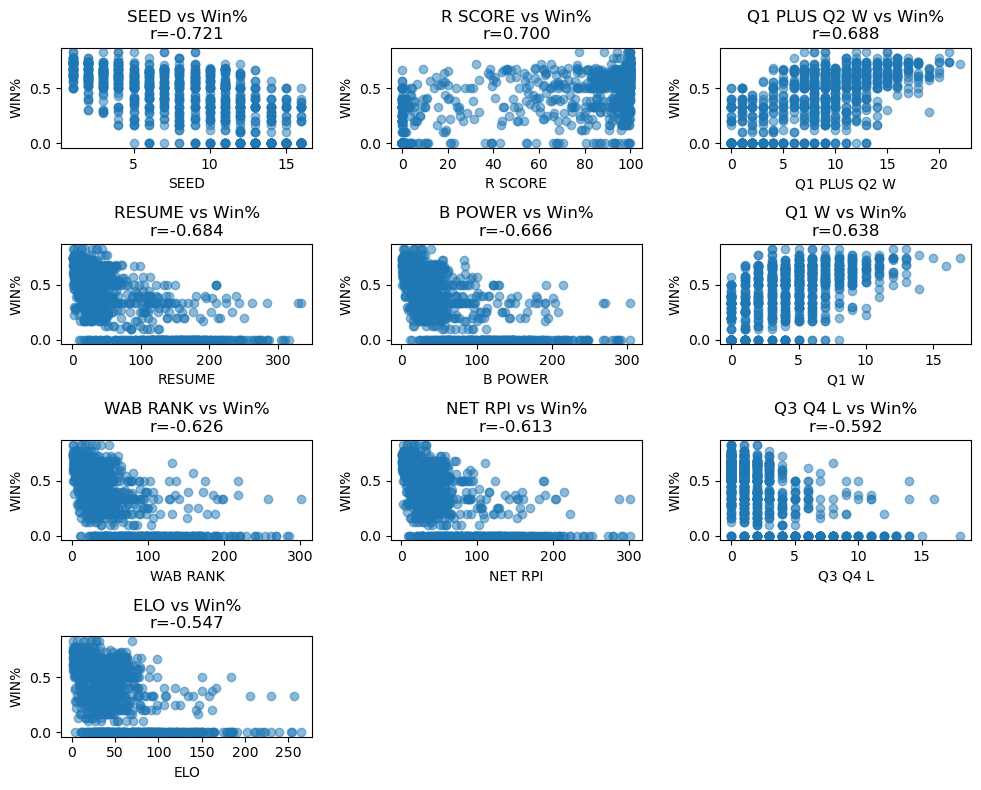

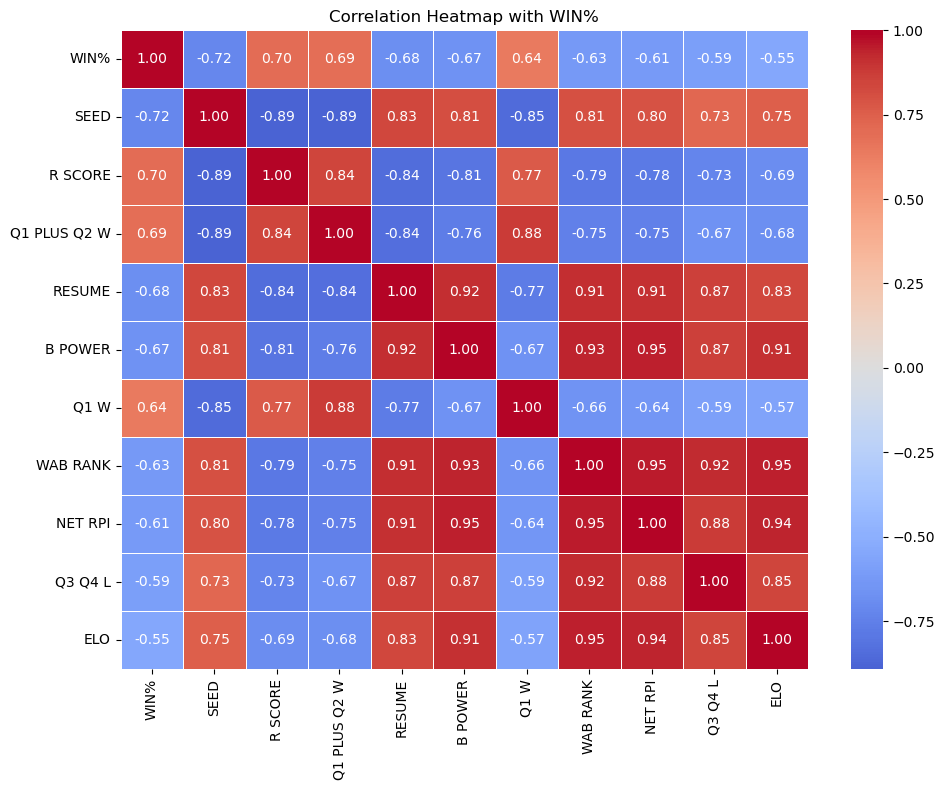

In [18]:
# Visualize correlations with scatter plots
graph_correlate_with_win_pct(resumes_df, team_results_df, "TEAM", 'WIN%', team_results_dropped)

# Alternative visualization with heatmap
graph_correlate_with_win_pct(resumes_df, team_results_df, "TEAM", 'WIN%', team_results_dropped, plot_type='heatmap')

In [19]:
def plot_variables_by_round(df, dropped_columns_list):
    """
    Create plots showing how each variable relates to tournament round reached.
    """
    # drop any categorical column names 
    column_names = df.columns.drop(dropped_columns_list)
    
    # Create a figure for subplots
    num_cols = 3
    num_rows = (len(column_names) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
    axes = axes.flatten() if num_rows > 1 else [axes]
    
    plot_index = 0
    for column_name in column_names:
        stat_vector, round_vector = create_stat_vs_round_vector(df, column_name)

        stat_vector = np.array(stat_vector)
        round_vector = np.array(round_vector)
        
        # Combines data for champion, finalist, and final four teams 
        replace_dict = {1: 4, 2: 4}
        rounds = np.array([replace_dict.get(x, x) for x in round_vector])
        
        # Create plot on current subplot
        sns.violinplot(x=rounds, y=stat_vector, ax=axes[plot_index])
        
        axes[plot_index].set_title(f'{column_name} vs Round')
        axes[plot_index].set_xlabel('Round Reached')
        axes[plot_index].set_ylabel(column_name)
        
        # Add a bit more information
        axes[plot_index].set_xticks(range(len(np.unique(rounds))))
        axes[plot_index].set_xticklabels([f"Round {r}" for r in sorted(np.unique(rounds))])
        
        plot_index += 1
    
    # Hide any unused subplots
    for i in range(plot_index, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


In [20]:
#plot_variables_by_round(even_miya_df, even_miya_dropped_columns)

In [21]:
#plot_variables_by_round(shooting_splits_df, shooting_splits_dropped_columns)

In [22]:
#plot_variables_by_round(resumes_df, resumes_df_columns)

In [23]:
#plot_variables_by_round(KenPom_Barttorvik_df, KenPom_Bart_dropped_columns)

In [24]:
#plot_variables_by_round(team_rankings_df, team_rankings_dropped_columns)

In [25]:
import glob

csv_files = glob.glob("./Data_Needs_updated_after_selection_sunday/*.csv")


print(csv_files)

['./Data_Needs_updated_after_selection_sunday\\538 Ratings.csv', './Data_Needs_updated_after_selection_sunday\\AP Poll Week 6.csv', './Data_Needs_updated_after_selection_sunday\\Barttorvik Away-Neutral.csv', './Data_Needs_updated_after_selection_sunday\\Barttorvik Away.csv', './Data_Needs_updated_after_selection_sunday\\Barttorvik Home.csv', './Data_Needs_updated_after_selection_sunday\\Barttorvik Neutral.csv', './Data_Needs_updated_after_selection_sunday\\Coach Results.csv', './Data_Needs_updated_after_selection_sunday\\Conference Results.csv', './Data_Needs_updated_after_selection_sunday\\Conference Stats Away Neutral.csv', './Data_Needs_updated_after_selection_sunday\\Conference Stats Away.csv', './Data_Needs_updated_after_selection_sunday\\Conference Stats Home.csv', './Data_Needs_updated_after_selection_sunday\\Conference Stats Neutral.csv', './Data_Needs_updated_after_selection_sunday\\Conference Stats.csv', './Data_Needs_updated_after_selection_sunday\\EvanMiya.csv', './Data_Nee

In [26]:

# Read both CSVs and set 'TEAM NO' as the index
df_all = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Resumes.csv")
df_temp = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Shooting Splits.csv")
df_temp2 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Away.csv")
df_temp3 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Home.csv")
df_temp4 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Neutral.csv")
df_temp5 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/KenPom Barttorvik.csv")

df_temp6 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Away.csv")
df_temp7 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Home.csv")
df_temp8 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Neutral.csv")

# removing columns that are not needed
df_all = df_temp.drop(columns=['TEAM'])
df_temp = df_temp.drop(columns=['YEAR', 'TEAM ID', 'TEAM', "CONF"])
df_temp2 = df_temp2.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp3 = df_temp3.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp4 = df_temp4.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp5 = df_temp5.drop(columns=["YEAR", "SEED", "ROUND", "TEAM", "TEAM ID", "CONF","CONF ID","QUAD NO","QUAD ID"])

df_temp6 = df_temp6.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp7 = df_temp7.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp8 = df_temp8.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])

# Standardize 'TEAM NO'
df_all['TEAM NO'] = df_all['TEAM NO'].astype(str).str.strip()
df_temp['TEAM NO'] = df_temp['TEAM NO'].astype(str).str.strip()
df_temp2['TEAM NO'] = df_temp2['TEAM NO'].astype(str).str.strip()
df_temp3['TEAM NO'] = df_temp3['TEAM NO'].astype(str).str.strip()
df_temp4['TEAM NO'] = df_temp4['TEAM NO'].astype(str).str.strip()
df_temp5['TEAM NO'] = df_temp5['TEAM NO'].astype(str).str.strip()

df_temp6['TEAM NO'] = df_temp6['TEAM NO'].astype(str).str.strip()
df_temp7['TEAM NO'] = df_temp7['TEAM NO'].astype(str).str.strip()
df_temp8['TEAM NO'] = df_temp8['TEAM NO'].astype(str).str.strip()

# Remove duplicates
df_all = df_all.drop_duplicates(subset='TEAM NO')
df_temp = df_temp.drop_duplicates(subset='TEAM NO')
df_temp2 = df_temp2.drop_duplicates(subset='TEAM NO')
df_temp3 = df_temp3.drop_duplicates(subset='TEAM NO')
df_temp4 = df_temp4.drop_duplicates(subset='TEAM NO')
df_temp5 = df_temp5.drop_duplicates(subset='TEAM NO')
df_temp6 = df_temp6.drop_duplicates(subset='TEAM NO')
df_temp7 = df_temp7.drop_duplicates(subset='TEAM NO')
df_temp8 = df_temp8.drop_duplicates(subset='TEAM NO')

# Set 'TEAM NO' as the index
df_all = df_all.set_index('TEAM NO')
df_temp = df_temp.set_index('TEAM NO')
df_temp2 = df_temp2.set_index('TEAM NO')
df_temp3 = df_temp3.set_index('TEAM NO')
df_temp4 = df_temp4.set_index('TEAM NO')
df_temp5 = df_temp5.set_index("TEAM NO")

df_temp6 = df_temp6.set_index('TEAM NO')
df_temp7 = df_temp7.set_index("TEAM NO")
df_temp8 = df_temp8.set_index('TEAM NO')


# Optional: Rename columns to avoid conflicts
df_temp.columns = [f"ShootingSplits_{col}" for col in df_temp.columns]
df_temp2.columns = [f"TeamRankings_Away_{col}" for col in df_temp2.columns]
df_temp3.columns = [f"TeamRankings_Home_{col}" for col in df_temp3.columns]
df_temp4.columns = [f"TeamRankings_Neutral_{col}" for col in df_temp4.columns]
df_temp5.columns = [f"KenPom_Barttorvik{col}" for col in df_temp5.columns]
df_temp6.columns = [f"Barttorvik_Away_{col}" for col in df_temp6.columns]
df_temp7.columns = [f"Barttorvik_Home_{col}" for col in df_temp7.columns]
df_temp8.columns = [f"Barttorvik_Neutral_{col}" for col in df_temp8.columns]


# Now join on the index (TEAM NO)
df_all = df_all.join(df_temp, how='outer')
df_all = df_all.join(df_temp2, how='outer')
df_all = df_all.join(df_temp3, how='outer')
df_all = df_all.join(df_temp4, how='outer')
df_all = df_all.join(df_temp5, how='outer')

df_all = df_all.join(df_temp6, how='outer')
df_all = df_all.join(df_temp7, how='outer')
df_all = df_all.join(df_temp8, how='outer')
# Reset index if needed
df_all = df_all.dropna(axis=0)
df_all = df_all.reset_index()



print(df_all.shape)
print(df_all.head())





(924, 431)
  TEAM NO    YEAR  TEAM ID CONF  DUNKS FG%  DUNKS SHARE  DUNKS FG%D  \
0    1000  2023.0     48.0  MVC       72.7          2.7        88.2   
1    1001  2023.0     43.0   BE       94.7         10.4        78.9   
2    1002  2023.0     40.0   BE       85.0         11.8        86.8   
3    1003  2023.0     37.0  CAA       86.5          4.6        79.5   
4    1004  2023.0     36.0  Pat       95.7          1.8        91.8   

   DUNKS D SHARE  CLOSE TWOS FG%  CLOSE TWOS SHARE  ...  \
0            2.8            61.8              30.6  ...   
1            4.3            63.6              37.0  ...   
2            4.6            64.2              37.8  ...   
3            3.2            60.9              33.8  ...   
4            3.9            63.4              42.3  ...   

   Barttorvik_Neutral_BADJT RANK  Barttorvik_Neutral_AVG HGT RANK  \
0                          284.0                            282.0   
1                           69.0                             61.0   


In [27]:
#*******
#Important note, shooting splits is missing info from 2008 and 2009 (no data for those)
#******

In [28]:
df_all

,TEAM NO,YEAR,TEAM ID,CONF,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,CLOSE TWOS SHARE,...,Barttorvik_Neutral_BADJT RANK,Barttorvik_Neutral_AVG HGT RANK,Barttorvik_Neutral_EFF HGT RANK,Barttorvik_Neutral_EXP RANK,Barttorvik_Neutral_TALENT RANK,Barttorvik_Neutral_FT% RANK,Barttorvik_Neutral_OP FT% RANK,Barttorvik_Neutral_PPPO RANK,Barttorvik_Neutral_PPPD RANK,Barttorvik_Neutral_ELITE SOS RANK
0,1000,2023.0,48.0,MVC,72.7,2.7,88.2,2.8,61.8,30.6,...,284.0,282.0,162.0,95.0,173.0,98.0,60.0,71.0,29.0,159.0
1,1001,2023.0,43.0,BE,94.7,10.4,78.9,4.3,63.6,37.0,...,69.0,61.0,26.0,293.0,17.0,57.0,120.0,83.0,247.0,26.0
2,1002,2023.0,40.0,BE,85.0,11.8,86.8,4.6,64.2,37.8,...,277.0,28.0,61.0,258.0,23.0,115.0,84.0,19.0,68.0,7.0
3,1003,2023.0,37.0,CAA,86.5,4.6,79.5,3.2,60.9,33.8,...,45.0,197.0,201.0,162.0,339.0,89.0,136.0,141.0,11.0,227.0
4,1004,2023.0,36.0,Pat,95.7,1.8,91.8,3.9,63.4,42.3,...,140.0,117.0,52.0,116.0,339.0,135.0,43.0,9.0,202.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,995,2023.0,68.0,WCC,92.9,5.7,84.3,6.2,67.5,39.7,...,61.0,49.0,64.0,89.0,7.0,226.0,268.0,32.0,166.0,12.0
920,996,2023.0,60.0,SC,91.5,9.1,93.6,3.8,65.9,37.8,...,140.0,239.0,260.0,206.0,243.0,178.0,164.0,33.0,197.0,184.0
921,997,2023.0,56.0,CUSA,77.3,7.1,93.2,4.2,58.6,40.0,...,154.0,304.0,280.0,160.0,140.0,96.0,266.0,94.0,2.0,109.0
922,998,2023.0,54.0,NEC,79.4,2.5,90.9,6.6,57.4,36.4,...,11.0,340.0,340.0,189.0,339.0,23.0,171.0,24.0,290.0,327.0


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_all = df_all[df_all['YEAR'] != 2008]
df_all = df_all[df_all['YEAR'] != 2009]
df_all = df_all.dropna(axis=0)
df_all = df_all.drop(columns=['YEAR', 'CONF', 'TEAM ID'])
cols_to_scale = [col for col in df_all.columns if col != 'TEAM NO']
df_all_scaled = pd.DataFrame(
    scaler.fit_transform(df_all[cols_to_scale]),
    columns=cols_to_scale
)
df_all_scaled['TEAM NO'] = df_all['TEAM NO']
print(df_all_scaled.shape)
print(df_all_scaled.head())

(924, 428)
   DUNKS FG%  DUNKS SHARE  DUNKS FG%D  DUNKS D SHARE  CLOSE TWOS FG%  \
0  -3.766147    -1.457175    0.011082      -1.511751       -0.170604   
1   1.134803     1.237434   -1.882081      -0.480859        0.268907   
2  -1.026070     1.727363   -0.273911      -0.274681        0.415411   
3  -0.691914    -0.792271   -1.759941      -1.236846       -0.390359   
4   1.357574    -1.772129    0.743919      -0.755764        0.220073   

   CLOSE TWOS SHARE  CLOSE TWOS FG%D  CLOSE TWOS D SHARE  FARTHER TWOS FG%  \
0         -0.984538        -0.637306           -0.983934          1.482175   
1          0.312244        -0.302747           -0.163757          0.825134   
2          0.474342        -1.067452            0.988924         -0.946018   
3         -0.336147         0.677030           -0.097256          0.025259   
4          1.386143         0.796515           -0.496261          2.196349   

   FARTHER TWOS SHARE  ...  Barttorvik_Neutral_AVG HGT RANK  \
0            0.557526  .

In [30]:
df_all_scaled.columns

Index(['DUNKS FG%', 'DUNKS SHARE', 'DUNKS FG%D', 'DUNKS D SHARE',
       'CLOSE TWOS FG%', 'CLOSE TWOS SHARE', 'CLOSE TWOS FG%D',
       'CLOSE TWOS D SHARE', 'FARTHER TWOS FG%', 'FARTHER TWOS SHARE',
       ...
       'Barttorvik_Neutral_AVG HGT RANK', 'Barttorvik_Neutral_EFF HGT RANK',
       'Barttorvik_Neutral_EXP RANK', 'Barttorvik_Neutral_TALENT RANK',
       'Barttorvik_Neutral_FT% RANK', 'Barttorvik_Neutral_OP FT% RANK',
       'Barttorvik_Neutral_PPPO RANK', 'Barttorvik_Neutral_PPPD RANK',
       'Barttorvik_Neutral_ELITE SOS RANK', 'TEAM NO'],
      dtype='object', length=428)

## Data Processing

In [70]:
import random
matchup_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
matchups = []
first_team_no = 0
for index, row in matchup_df.iterrows():
    if index % 2 == 0:
        team_1_no = row["TEAM NO"]
        team_1_score = row["SCORE"]
        team_1_seed = row["SEED"]
    else:
        team_0_no = row["TEAM NO"]
        team_0_score = row["SCORE"]
        team_0_seed = row["SEED"]

        winner = 1 if team_1_score > team_0_score else 0
        
        if team_1_seed == team_0_seed:
            lower_seed_won = random.randint(0, 1)
        else:
            team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
            lower_seed_won = 1 if winner == team_1_seed_is_lower else 0

        matchup = (team_1_no, team_0_no, winner, lower_seed_won)
        matchups.append(matchup)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# create difference vector of matchup stats

pred_winners = []
true_winners = []
difference_vectors = []


for matchup in matchups:
    team_1_NO = matchup[0]
    team_0_NO = matchup[1]

    true_winners.append(matchup[2])
    
    if (not df_all_scaled[df_all_scaled["TEAM NO"] == team_1_NO].empty) and (not df_all_scaled[df_all_scaled["TEAM NO"] == team_0_NO].empty):
        team_1_NO = str(team_1_NO)
        team_0_NO = str(team_0_NO)
        print(team_0_NO)
        team_1_stats = df_all_scaled[df_all_scaled["TEAM NO"] == team_1_NO].iloc[0].drop("TEAM NO").values
        team_0_stats = df_all_scaled[df_all_scaled["TEAM NO"] == team_0_NO].iloc[0].drop("TEAM NO").values
    difference_vector = team_1_stats - team_0_stats
    difference_vectors.append(difference_vector)

In [71]:
# Base Model: pikc the lower seed, if the seeds are the same, flip a coin.
# This is calculated in the matchup creation
total_lower_seeds_won = 0
for matchup in matchups:
    total_lower_seeds_won += matchup[3]

print(f'Accuracy of Base Model: {total_lower_seeds_won / len(matchups)}')

Accuracy of Base Model: 0.7040714995034757


In [68]:
# Do logistic regression with all features
X_train, X_test, y_train, y_test = train_test_split(difference_vectors, true_winners, test_size=0.2, random_state=42)

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

predicted_winners = LR_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predicted_winners))



# def predict_winner_logR(difference_vector, logistic_regression_model):
#     winner = logistic_regression_model.predict(difference_vector)
#     return "Team 1 Wins" if winner == 1 else "Team 2 Wins"

Accuracy: 0.6386138613861386


In [ ]:
# Greedy logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

def greedy_feature_selection(X_train, y_train, X_test, y_test, max_features=20):
    """
    Implements a forward selection algorithm for logistic regression.
    Starts with no features and adds one feature at a time based on improving accuracy.
    
    Parameters:
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - max_features: Maximum number of features to include
    
    Returns:
    - selected_features: Indices of selected features
    - best_model: Best logistic regression model
    - best_accuracy: Test accuracy of the best model
    """
    # Convert to numpy arrays if they're not already
    X_train_np = np.array(X_train)
    X_test_np = np.array(X_test)
    
    n_features = X_train_np.shape[1]
    best_accuracy = 0
    selected_features = []
    remaining_features = list(range(n_features))
    
    for i in range(min(max_features, n_features)):
        best_feature = None
        best_feature_accuracy = 0
        
        # Try each remaining feature
        for feature in remaining_features:
            current_features = selected_features + [feature]
            
            # Train model on current feature set
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train_np[:, current_features], y_train)
            
            # Calculate accuracy on test set
            y_pred = model.predict(X_test_np[:, current_features])
            accuracy = accuracy_score(y_test, y_pred)
            
            # Check if this feature improves accuracy
            if accuracy > best_feature_accuracy:
                best_feature = feature
                best_feature_accuracy = accuracy
        
        # If we found a feature that improves accuracy
        if best_feature is not None and best_feature_accuracy > best_accuracy:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_accuracy = best_feature_accuracy
            print(f"Added feature {best_feature}, Test accuracy: {best_accuracy:.4f}")
        else:
            # No improvement, stop adding features
            break
    
    # Train final model with selected features
    best_model = LogisticRegression(max_iter=1000)
    best_model.fit(X_train_np[:, selected_features], y_train)
    
    return selected_features, best_model, best_accuracy

In [ ]:
# Run greedy feature selection
# Convert lists to numpy arrays if they are not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Run greedy feature selection
selected_features, greedy_model, best_accuracy = greedy_feature_selection(X_train_np, y_train, X_test_np, y_test, max_features=15)

print("\nFinal Results:")
print(f"Selected {len(selected_features)} features: {selected_features}")
print(f"Best test accuracy: {best_accuracy:.4f}")

# Compare with base model (pick lower seed)
lower_seed_accuracy = total_lower_seeds_won / len(matchups)
print(f"\nBase model accuracy (pick lower seed): {lower_seed_accuracy:.4f}")

# Compare with full model (all features)
full_model = LogisticRegression(max_iter=1000)
full_model.fit(X_train_np, y_train)
full_model_preds = full_model.predict(X_test_np)
full_model_accuracy = accuracy_score(y_test, full_model_preds)
print(f"Full model accuracy (all features): {full_model_accuracy:.4f}")

In [ ]:
# Evaluate the importance of selected features
if len(selected_features) > 0:
    feature_importances = np.abs(greedy_model.coef_[0])
    
    # Create a DataFrame for better visualization
    importances_df = pd.DataFrame({
        'Feature Index': selected_features,
        'Feature Importance': feature_importances
    })
    
    importances_df = importances_df.sort_values('Feature Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances_df)), importances_df['Feature Importance'])
    plt.xticks(range(len(importances_df)), importances_df['Feature Index'], rotation=90)
    plt.xlabel('Feature Index')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Greedy Logistic Regression Feature Importance')
    plt.tight_layout()
    plt.show()
    
    # For selected features, we could also look at the difference vectors to understand what these indices represent
    print("\nTop 5 most important features:")
    print(importances_df.head(5))

In [ ]:
# Cross-validation evaluation for a more robust performance estimate
def cross_validate_model(X, y, feature_indices, n_splits=5):
    """Perform cross-validation on selected features"""
    X_np = np.array(X)
    X_selected = X_np[:, feature_indices] if len(feature_indices) > 0 else X_np
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    
    for train_idx, test_idx in kf.split(X_selected):
        X_train_cv, X_test_cv = X_selected[train_idx], X_selected[test_idx]
        y_train_cv, y_test_cv = np.array(y)[train_idx], np.array(y)[test_idx]
        
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train_cv, y_train_cv)
        
        y_pred = model.predict(X_test_cv)
        accuracy = accuracy_score(y_test_cv, y_pred)
        accuracies.append(accuracy)
    
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    
    return mean_accuracy, std_accuracy

# Run cross-validation
mean_acc, std_acc = cross_validate_model(np.array(difference_vectors), true_winners, selected_features)

print(f"\nCross-validation results for greedy model:")
print(f"Mean accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

# Also evaluate full model for comparison
full_mean_acc, full_std_acc = cross_validate_model(np.array(difference_vectors), true_winners, list(range(len(difference_vectors[0]))))

print(f"\nCross-validation results for full model:")
print(f"Mean accuracy: {full_mean_acc:.4f} ± {full_std_acc:.4f}")

# And a dummy model that always predicts lower seed wins
lower_seed_predictions = [1] * len(true_winners)  # Always predict 1 (lower seed wins)
lower_seed_acc = accuracy_score(true_winners, lower_seed_predictions)
print(f"\nLower seed baseline accuracy: {lower_seed_acc:.4f}")

In [ ]:
# DNN imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras import layers

In [ ]:

X_train0, X_test0, y_train0, y_test0 = train_test_split(difference_vectors, true_winners, test_size =, random_state=0)
print(X_train0.shape())

print(X_test0.shape())
print(y_train0.shape())
print(y_test0.shape())

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# DNN

def run_binary_mlp(X_train, y_train, X_test, y_test, hidden=64, epochs=10):
    model = Sequential()
    model.add(Dense(hidden, activation='relu', input_shape=(len(X_train),)))
    model.add(Dropout(0.5))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # output layer, add hidden layers before this
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
    model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=16,epochs=epochs,
                        verbose=1)
    
    model.summary()
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))
    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    return history

In [ ]:
# Run DNN
history = run_binary_mlp(X_train, y_train, X_test, y_test,64,5)